In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("Reviews.csv")
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [4]:
df.sort_values("ProductId",inplace=True)

In [5]:
df.head(1)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
150528,150529,0006641040,A25ACLV5KPB4W,"Matt Hetling ""Matt""",0,1,4,1108425600,"Nice cadence, catchy rhymes",In June<br />I saw a charming group<br />of ro...


In [6]:
df.shape

(568454, 10)

In [7]:
df.duplicated(subset={"UserId","ProfileName","Time","Text"}).sum()

174521

In [8]:
df.drop_duplicates(subset={"UserId","ProfileName","Time","Text"},inplace=True)

In [9]:
df.shape

(393933, 10)

We can see that only 69.25 % data is remaining after removing the duplicates, we observed that 30.75% data is duplicated in our original data.

## Exploratory Data analysis

In [10]:
df["Score"].value_counts()

5    250967
4     56087
1     36307
3     29772
2     20800
Name: Score, dtype: int64

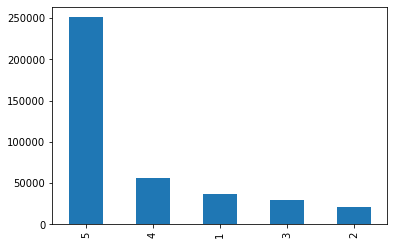

In [11]:
df["Score"].value_counts().plot(kind='bar')

I first looked at the distribution of ratings among all of the reviews. We see that 5-star reviews constitute a large proportion (64%) of all reviews. The next most prevalent rating is 4-stars(14%), followed by 1-star (9%), 3-star (8%), and finally 2-star reviews (5%).

In [12]:
df["HelpfulnessDenominator"].value_counts()[0]/df.shape[0]*100

46.86558374139765

Among all reviews, almost half (47%) are not voted on at all.

In [13]:
helpful=df[df["HelpfulnessDenominator"]!=0][["HelpfulnessNumerator","HelpfulnessDenominator"]]

In [14]:
helpful["helpful_score"]=helpful["HelpfulnessNumerator"]/helpful["HelpfulnessDenominator"]

In [15]:
def helpful_fun(x):
    if x >0.75 and x<=1:
        return ">75%"
    elif x>0.25 and x<=0.75:
        return "25%-75%"
    else:
        return "<25%"

In [16]:
helpful["helpful_score"].map(helpful_fun).value_counts()

>75%       144910
25%-75%     37348
<25%        27056
Name: helpful_score, dtype: int64

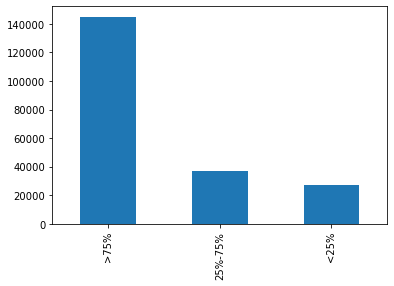

In [17]:
helpful["helpful_score"].map(helpful_fun).value_counts().plot(kind='bar')

I divided the reviews that were voted upon into three categories: Helpful reviews had more than 75% of voters find the review helpful, unhelpful reviews had less than 25% of voters find the review helpful, and an intermediate group of 25-75% helpfulness.

In [18]:
score_group=df[["Score","Text"]]

In [19]:
score_group["Text_count"]=score_group["Text"].map(lambda x:len(x.split()))

In [20]:
score_group.head()

,Score,Text,Text_count
150528,4,In June<br />I saw a charming group<br />of ro...,95
150506,4,This is a fun way for children to learn their ...,35
150505,4,"I grew up reading these Sendak books, and watc...",48
150504,4,Get the movie or sound track and sing along wi...,30
150503,4,A very entertaining rhyming story--cleaver and...,28


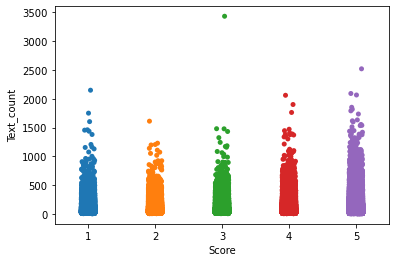

In [21]:
sns.stripplot(x='Score', y='Text_count', data=score_group)

In [22]:
score_group.groupby("Score").get_group(5).describe()

,Score,Text_count
count,250967.0,250967.000000
mean,5.0,73.935223
std,0.0,72.122172
min,5.0,3.000000
25%,5.0,32.000000
50%,5.0,52.000000
75%,5.0,89.000000
max,5.0,2520.000000


In [23]:
score_group.groupby("Score").get_group(4).describe()

,Score,Text_count
count,56087.0,56087.000000
mean,4.0,91.961863
std,0.0,87.545680
min,4.0,6.000000
25%,4.0,37.000000
50%,4.0,65.000000
75%,4.0,115.000000
max,4.0,2061.000000


In [24]:
score_group.groupby("Score").get_group(3).describe()

,Score,Text_count
count,29772.0,29772.000000
mean,3.0,96.206973
std,0.0,88.777131
min,3.0,7.000000
25%,3.0,41.000000
50%,3.0,70.000000
75%,3.0,122.000000
max,3.0,3432.000000


In [25]:
score_group.groupby("Score").get_group(2).describe()

,Score,Text_count
count,20800.0,20800.000000
mean,2.0,90.232885
std,0.0,81.052820
min,2.0,6.000000
25%,2.0,40.000000
50%,2.0,67.000000
75%,2.0,112.000000
max,2.0,1612.000000


In [26]:
score_group.groupby("Score").get_group(1).describe()

,Score,Text_count
count,36307.0,36307.000000
mean,1.0,82.454293
std,0.0,77.363860
min,1.0,3.000000
25%,1.0,37.000000
50%,1.0,61.000000
75%,1.0,101.000000
max,1.0,2149.000000


Positive reviews are very common.
Positive reviews are shorter.
Longer reviews are more helpful.
Despite being more common and shorter, positive reviews are found more helpful.
Frequent reviewers are more discerning in their ratings, write longer reviews, and write more helpful reviews.

## Pre-Processing

In [27]:
df.shape

(393933, 10)

In [28]:
def filter(x): #---> positive-1, negative-0
    if x>=3:
        return 1
    else:
        return 0

In [29]:
df["Score"]=df["Score"].map(filter)

In [30]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
150528,150529,0006641040,A25ACLV5KPB4W,"Matt Hetling ""Matt""",0,1,1,1108425600,"Nice cadence, catchy rhymes",In June<br />I saw a charming group<br />of ro...
150506,150507,0006641040,A1S4A3IQ2MU7V4,"sally sue ""sally sue""",1,1,1,1191456000,chicken soup with rice months,This is a fun way for children to learn their ...
150505,150506,0006641040,A2IW4PEEKO2R0U,Tracy,1,1,1,1194739200,"Love the book, miss the hard cover version","I grew up reading these Sendak books, and watc..."
150504,150505,0006641040,A2PTSM496CF40Z,"Jason A. Teeple ""Nobody made a greater mistak...",1,1,1,1210809600,A classic,Get the movie or sound track and sing along wi...
150503,150504,0006641040,AQEYF1AXARWJZ,"Les Sinclair ""book maven""",1,1,1,1212278400,Chicken Soup with Rice,A very entertaining rhyming story--cleaver and...


In [31]:
df["Score"].value_counts()

1    336826
0     57107
Name: Score, dtype: int64

In [32]:
df.loc[df['Score'] == 1]['Text']

150528    In June<br />I saw a charming group<br />of ro...
150506    This is a fun way for children to learn their ...
150505    I grew up reading these Sendak books, and watc...
150504    Get the movie or sound track and sing along wi...
150503    A very entertaining rhyming story--cleaver and...
                                ...                        
193171    FTS Zero is the best sweetener I have ever tri...
188388    You have to try this sauce to believe it! It s...
221794    I bought this Hazelnut Paste (Nocciola Spread)...
5702      Purchased this product at a local store in NY ...
327600    I purchased this to send to my son who's away ...
Name: Text, Length: 336826, dtype: object

In [33]:
df[df['HelpfulnessNumerator'] > df['HelpfulnessDenominator']]

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
64421,64422,B000MIDROQ,A161DK06JJMCYF,"J. E. Stephens ""Jeanne""",3,1,1,1224892800,Bought This for My Son at College,My son loves spaghetti so I didn't hesitate or...
44736,44737,B001EQ55RW,A2V0I904FH7ABY,Ram,3,2,1,1212883200,Pure cocoa taste with crunchy almonds inside,It was almost a 'love at first bite' - the per...


In [34]:
df.drop([64421,44736],inplace=True)

In [35]:
df[df['HelpfulnessNumerator'] > df['HelpfulnessDenominator']]

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text


In [36]:
df = df[["Text","Score","HelpfulnessNumerator","HelpfulnessDenominator"]]
df.head()

,Text,Score,HelpfulnessNumerator,HelpfulnessDenominator
150528,In June<br />I saw a charming group<br />of ro...,1,0,1
150506,This is a fun way for children to learn their ...,1,1,1
150505,"I grew up reading these Sendak books, and watc...",1,1,1
150504,Get the movie or sound track and sing along wi...,1,1,1
150503,A very entertaining rhyming story--cleaver and...,1,1,1


In [37]:
!pip install wordcloud
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [38]:
positive_wc = wc.generate(df[df['Score'] == 1]['Text'].str.cat(sep=" "))

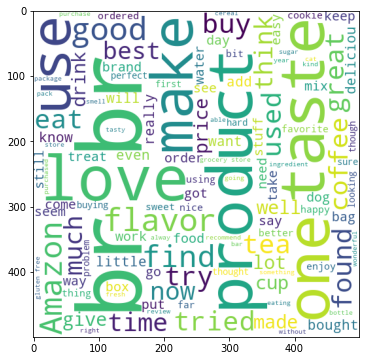

In [39]:
plt.figure(figsize=(15,6))
plt.imshow(positive_wc)

In [40]:
negative_wc = wc.generate(df[df['Score'] == 0]['Text'].str.cat(sep=" "))

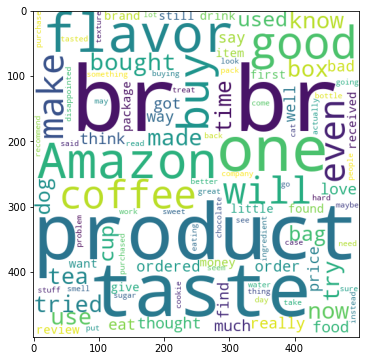

In [41]:
plt.figure(figsize=(15,6))
plt.imshow(negative_wc)

In [42]:
#Up sampling of negative(critical)

In [43]:
from sklearn.utils import resample

text_Critical__oversampled, y_Critical_oversampled,helpful_critical_num,helpful_critical_deno = resample(df['Text'].loc[df['Score'] == 0],
                                        df['Score'].loc[df['Score'] == 0],
                                        df['HelpfulnessNumerator'].loc[df['Score'] == 0],
                                        df['HelpfulnessDenominator'].loc[df['Score'] == 0],                      
                                        replace=True,
                                        n_samples=df['Text'].loc[df['Score'] == 1].shape[0],
                                        random_state=5)


critical_oversampled_df = pd.DataFrame()
critical_oversampled_df['Text'] = text_Critical__oversampled
critical_oversampled_df['Score'] =y_Critical_oversampled
critical_oversampled_df['HelpfulnessNumerator'] =helpful_critical_num
critical_oversampled_df['HelpfulnessDenominator'] =helpful_critical_deno

In [44]:
positive_df = df.loc[df['Score'] == 1]
positive_df.shape

(336824, 4)

In [45]:
critical_oversampled_df.shape

(336824, 4)

In [46]:
balanced_final = pd.concat([positive_df,critical_oversampled_df], ignore_index=True)
balanced_final['Score'].value_counts()

1    336824
0    336824
Name: Score, dtype: int64

In [47]:
balanced_final.head()

,Text,Score,HelpfulnessNumerator,HelpfulnessDenominator
0,In June<br />I saw a charming group<br />of ro...,1,0,1
1,This is a fun way for children to learn their ...,1,1,1
2,"I grew up reading these Sendak books, and watc...",1,1,1
3,Get the movie or sound track and sing along wi...,1,1,1
4,A very entertaining rhyming story--cleaver and...,1,1,1


In [48]:
balanced_final.shape

(673648, 4)

In [49]:
balanced_final.drop(["HelpfulnessNumerator","HelpfulnessDenominator"],inplace=True,axis=1)

In [50]:
balanced_final.shape

(673648, 2)

In [51]:
import re

import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from bs4 import BeautifulSoup

In [52]:
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [53]:
stopwords= set(['br', 'the', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"])

In [54]:
from tqdm import tqdm
preprocessed_reviews = []
# tqdm is for printing the status bar
for sentance in tqdm(balanced_final['Text'].values):
    sentance = re.sub(r"http\S+", "", sentance)
    sentance = BeautifulSoup(sentance, 'lxml').get_text()
    sentance = decontracted(sentance)
    sentance = re.sub("\S*\d\S*", "", sentance).strip()
    sentance = re.sub('[^A-Za-z]+', ' ', sentance)
    sentance = ' '.join(e.lower() for e in sentance.split() if e.lower() not in stopwords)
    preprocessed_reviews.append(sentance.strip())

100%|████████████████████████████████| 673648/673648 [06:24<00:00, 1752.75it/s]


In [55]:
preprocessed_reviews[1]

'fun way children learn months year learn poems throughout school year like handmotions invent poem'

In [56]:
sample_data = balanced_final.sample(n = 5000)
sample_data.head()

,Text,Score
397996,I received a completely different product than...,0
52660,"We love these, especially cold from the fridge...",1
265290,"I've had Earl Grey tea before and enjoyed it, ...",1
399354,This food has EXTREMELY high levels of protein...,0
304434,Having to eat gluten free I have tried almost ...,1


In [57]:
sample_data["Score"].value_counts()

0    2520
1    2480
Name: Score, dtype: int64

In [58]:
sample_reviews = [ preprocessed_reviews[i] for i in sample_data.index.values]
sample_reviews[0]

'received completely different product ordered product similar different brand not taste good would like product bought please'

In [59]:
sample_data['preprocessed'] = sample_reviews
sample_data.head()

,Text,Score,preprocessed
397996,I received a completely different product than...,0,received completely different product ordered ...
52660,"We love these, especially cold from the fridge...",1,love especially cold fridge even friends famil...
265290,"I've had Earl Grey tea before and enjoyed it, ...",1,earl grey tea enjoyed decided try brand loved ...
399354,This food has EXTREMELY high levels of protein...,0,food extremely high levels protein not dogs ne...
304434,Having to eat gluten free I have tried almost ...,1,eat gluten free tried almost every type bar av...


In [60]:
sample_data.drop("Text",axis=1,inplace=True)
sample_data.head()

,Score,preprocessed
397996,0,received completely different product ordered ...
52660,1,love especially cold fridge even friends famil...
265290,1,earl grey tea enjoyed decided try brand loved ...
399354,0,food extremely high levels protein not dogs ne...
304434,1,eat gluten free tried almost every type bar av...


In [61]:
import nltk

In [62]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [63]:
def stem(text):
    y=[]
    for i in text.split():
        y.append(ps.stem(i))
    
    return " ".join(y)

In [64]:
sample_data["preprocessed"]=sample_data["preprocessed"].map(stem)

In [65]:
sample_data.head()

,Score,preprocessed
397996,0,receiv complet differ product order product si...
52660,1,love especi cold fridg even friend famili not ...
265290,1,earl grey tea enjoy decid tri brand love flavo...
399354,0,food extrem high level protein not dog need hi...
304434,1,eat gluten free tri almost everi type bar avai...


In [66]:
X = sample_data.drop(columns =['Score'])
y = sample_data['Score'].values 
print(X.shape)
print(y.shape)

(5000, 1)
(5000,)


In [67]:
from sklearn.model_selection import train_test_split

In [68]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.2, random_state = 24)

print(train_X.shape)
print(train_y.shape)
print(test_X.shape)
print(test_y.shape)

(4000, 1)
(4000,)
(1000, 1)
(1000,)


In [69]:
#train_X vectorization
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

# count_vect = CountVectorizer(stop_words="english")
tfidf = TfidfVectorizer(stop_words="english",max_features=5000)

tfidf.fit(train_X['preprocessed'])
training_data = tfidf.transform(train_X['preprocessed'])

# num_feats =train_X[['HelpfulnessNumerator' ,'HelpfulnessDenominator']].values

# from scipy import sparse

# training_data = sparse.hstack(( num_feats, final_vectors))

training_data.shape

(4000, 5000)

In [70]:
#test_X vectorization
test_data = tfidf.transform(test_X['preprocessed'].values)
test_data.shape

(1000, 5000)

In [71]:
# test_feats = test_X[['HelpfulnessNumerator' ,'HelpfulnessDenominator']].values

# test_data = sparse.hstack(( test_feats, final_test_vectors))

# test_data.shape

In [72]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn import model_selection

In [73]:
#knn
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(training_data,train_y)
pred_knn = knn.predict(test_data)
acc_knn = accuracy_score(test_y, pred_knn) * float(100)
print('accuracy for k = %d is %d%%' % (5, acc_knn))
print(confusion_matrix(test_y, pred_knn))
print("precision_score",precision_score(test_y, pred_knn))

accuracy for k = 5 is 51%
[[282 234]
 [252 232]]
precision_score 0.4978540772532189


In [74]:
#gnb
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
gnb = GaussianNB()
y_pred_gnb = gnb.fit(training_data.toarray(),train_y).predict(test_data.toarray())
acc_gnb = accuracy_score(test_y, y_pred_gnb) * float(100)
print('accuracy for Gaussian Naive bayes is %d%%' % (acc_gnb))
print(confusion_matrix(test_y, y_pred_gnb))
print("precision_score",precision_score(test_y, y_pred_gnb))

accuracy for Gaussian Naive bayes is 59%
[[246 270]
 [135 349]]
precision_score 0.5638126009693053


In [75]:
#mnb
mnb = MultinomialNB()
y_pred_mnb = mnb.fit(training_data.toarray(),train_y).predict(test_data.toarray())
acc_mnb = accuracy_score(test_y, y_pred_mnb) * float(100)
print('accuracy for Multinomial Naive bayes is %d%%' % (acc_mnb))
print(confusion_matrix(test_y, y_pred_mnb))
print("precision_score",precision_score(test_y, y_pred_mnb))

accuracy for Multinomial Naive bayes is 82%
[[413 103]
 [ 75 409]]
precision_score 0.798828125


In [76]:
#bnb
bnb = BernoulliNB()
y_pred_bnb = bnb.fit(training_data.toarray(),train_y).predict(test_data.toarray())
acc_bnb = accuracy_score(test_y, y_pred_bnb) * float(100)
print('accuracy for Bernoulli Naive bayes is %d%%' % (acc_bnb))
print(confusion_matrix(test_y, y_pred_bnb))
print("precision_score",precision_score(test_y, y_pred_bnb))

accuracy for Bernoulli Naive bayes is 79%
[[389 127]
 [ 77 407]]
precision_score 0.7621722846441947


In [77]:
#tfidf with bernolli-pre-80

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [79]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)

In [80]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
}

In [81]:
def train_classifier(clf,training_data,train_y,test_data,test_y):
    clf.fit(training_data,train_y)
    y_pred = clf.predict(test_data)
    accuracy = accuracy_score(test_y,y_pred)
    precision = precision_score(test_y,y_pred)
    
    return accuracy,precision

In [82]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf,training_data,train_y,test_data,test_y)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.824
Precision -  0.8092369477911646
For  KN
Accuracy -  0.517
Precision -  0.5010989010989011
For  DT
Accuracy -  0.676
Precision -  0.7702702702702703
For  LR
Accuracy -  0.824
Precision -  0.8221757322175732
For  RF
Accuracy -  0.816
Precision -  0.8099173553719008
For  AdaBoost
Accuracy -  0.781
Precision -  0.768762677484787
For  BgC
Accuracy -  0.756
Precision -  0.734375
For  ETC
Accuracy -  0.825
Precision -  0.8212058212058212
For  GBDT
Accuracy -  0.75
Precision -  0.7746478873239436


In [83]:
clfs.keys()

dict_keys(['SVC', 'KN', 'DT', 'LR', 'RF', 'AdaBoost', 'BgC', 'ETC', 'GBDT'])

In [84]:
performance_df = pd.DataFrame({'Algorithm':list(clfs.keys()),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [85]:
performance_df

,Algorithm,Accuracy,Precision
3,LR,0.824,0.822176
7,ETC,0.825,0.821206
4,RF,0.816,0.809917
0,SVC,0.824,0.809237
8,GBDT,0.750,0.774648
2,DT,0.676,0.770270
5,AdaBoost,0.781,0.768763
6,BgC,0.756,0.734375
1,KN,0.517,0.501099


In [86]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
bnb = BernoulliNB()

from sklearn.ensemble import VotingClassifier

In [87]:
voting = VotingClassifier(estimators=[('svc', svc),('lrc', lrc), ('etc', etc), ('bnb',bnb)],voting='soft')

In [89]:
voting.fit(training_data,train_y)

VotingClassifier(estimators=[('svc',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('lrc',
                              LogisticRegression(penalty='l1',
                                                 solver='liblinear')),
                             ('etc',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2)),
                             ('bnb', BernoulliNB())],
                 voting='soft')

In [90]:
y_pred = voting.predict(test_data)
print("Accuracy",accuracy_score(test_y, y_pred))
print("Precision",precision_score(test_y, y_pred))

Accuracy 0.836
Precision 0.821285140562249


In [91]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(voting,open('model.pkl','wb'))